# Diabetes Prediction Model

#### In this notebook I have used the Diabetes data from [here](https://www.kaggle.com/johndasilva/diabetes). 
This is a classification problem

In [1]:
#Import the libraties for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')


D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import libraries for model creation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost 
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle



## Read the data from the csv file and store in df dataframe

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df_copy=df.copy()

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
#This is the Predictor Variable. Let's check the class ratio.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Get the rows and columns
df.shape

(768, 9)

### Lets find if there is any missing value 

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### There are no missing values in the data

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plotting the data

Text(0.5, 1.0, 'Outcome')

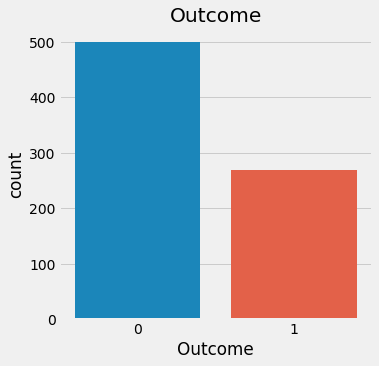

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(df['Outcome'])
plt.title('Outcome')

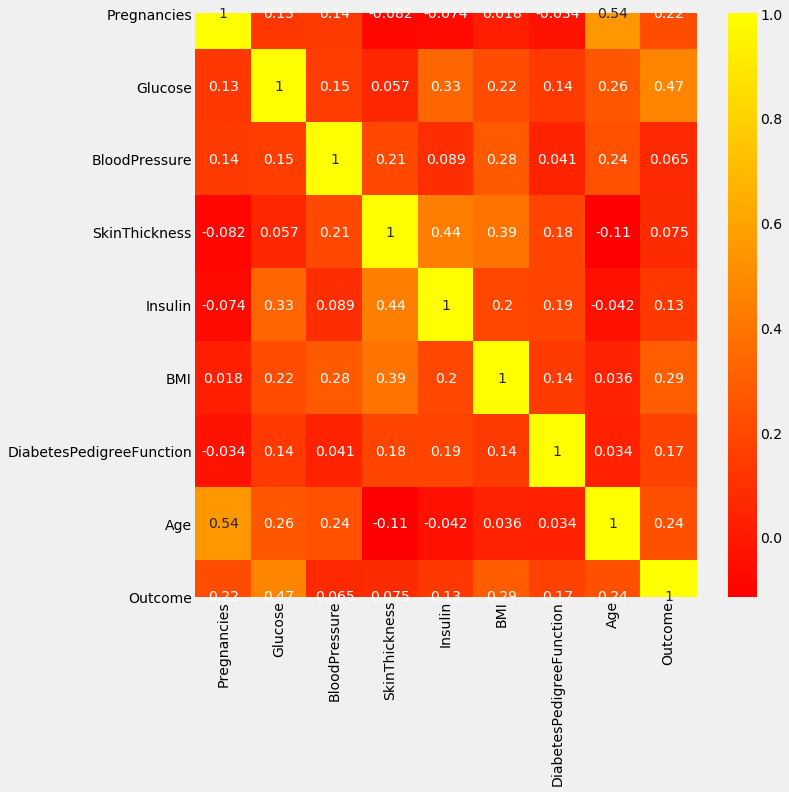

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='autumn')

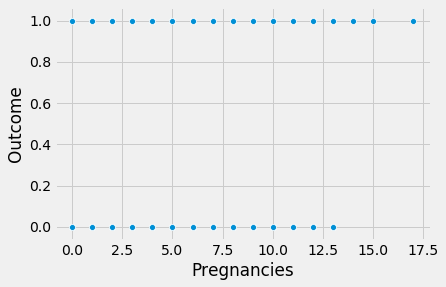

In [13]:
sns.scatterplot(x='Pregnancies',y='Outcome',data=df)


### From the above heatmap, we can see the correlation between 'BMI and SkinThickness=0.94','DiabetesPedigreeFunction and Pregnancies=0.9', 'BMI and Age=0.85' , 'Skin Thickness and Age=0.83'

In [14]:
features = [features for features in df.columns if features not in ['Outcome','Pregnancies']]
print(features)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


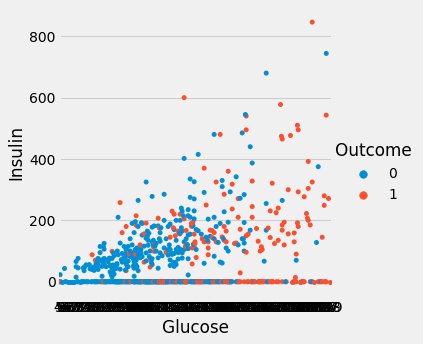

In [15]:
sns.catplot(x="Glucose", y="Insulin", hue="Outcome", kind="swarm", data=df);


In [16]:
#Some of the values are 0 in the dataset which are equivalent to missing data
for col in features:
    print(col, " has ", len(df[df[col]==0]), " 0 Values\n")

Glucose  has  5  0 Values

BloodPressure  has  35  0 Values

SkinThickness  has  227  0 Values

Insulin  has  374  0 Values

BMI  has  11  0 Values

DiabetesPedigreeFunction  has  0  0 Values

Age  has  0  0 Values



In [17]:
#Some of the values are 0 in the dataset. Replacing those values with the median for that particular feature
for inp in features:
    print(inp, " has ", len(df[df[inp]==0]), "number of 0 Values\n")
    df[inp]=df[inp].replace(0,df[inp].median())

    print("Updated ", inp, " has ", len(df[df[inp]==0]), "number of  0 Values\n")


Glucose  has  5 number of 0 Values

Updated  Glucose  has  0 number of  0 Values

BloodPressure  has  35 number of 0 Values

Updated  BloodPressure  has  0 number of  0 Values

SkinThickness  has  227 number of 0 Values

Updated  SkinThickness  has  0 number of  0 Values

Insulin  has  374 number of 0 Values

Updated  Insulin  has  0 number of  0 Values

BMI  has  11 number of 0 Values

Updated  BMI  has  0 number of  0 Values

DiabetesPedigreeFunction  has  0 number of 0 Values

Updated  DiabetesPedigreeFunction  has  0 number of  0 Values

Age  has  0 number of 0 Values

Updated  Age  has  0 number of  0 Values



In [18]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

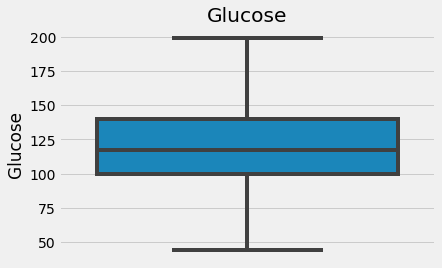

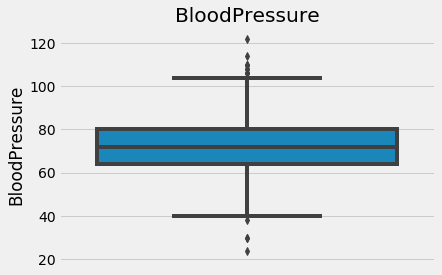

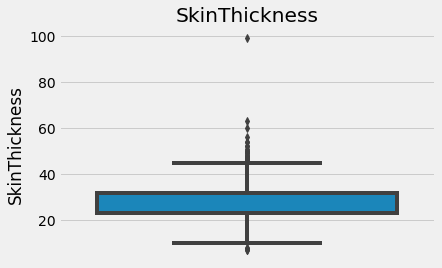

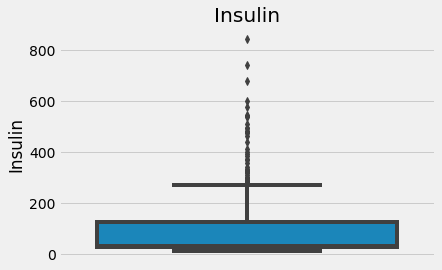

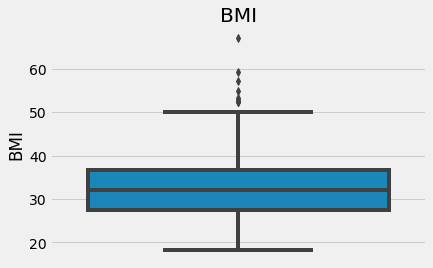

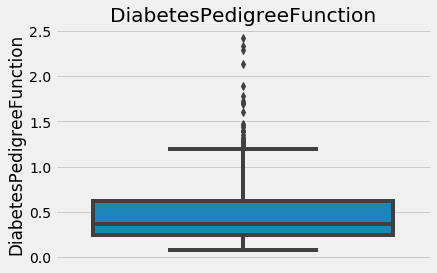

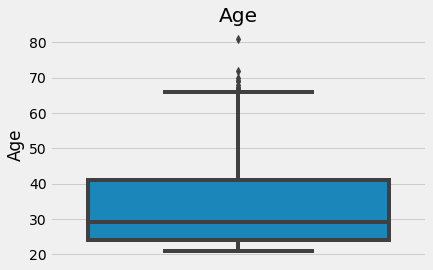

In [19]:
## Lets Find the relationship between Categorical Features and Sale Price

for inp in features:
    sns.boxplot(y=df[inp])
    plt.ylabel(inp)
    plt.title(inp)
    plt.show()

In [20]:
#df[df['Insulin']>600]

In [21]:
#df.drop(df[df['Insulin']>600].index,inplace=True)

In [22]:
#df[df['BMI']>100]

In [23]:
#df.drop(df[df['BMI']>100].index,inplace=True)

## Creating X and y variables for modelling

In [24]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

### Model Prediction

### Splitting the data into train and test

In [25]:
X_trainm,X_testm,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=10)

<IPython.core.display.Javascript object>

In [26]:
X_train=np.matrix(X_trainm)
X_test=np.matrix(X_testm)

#### First try with Naive Bayes Classifier

In [27]:
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)

GaussianNB()

In [28]:
predictionNB=nbmodel.predict(X_test)

### let's check the accuracy

In [29]:
print("Accuracy Score with Naive Bayes Model: ", metrics.accuracy_score(y_test,predictionNB))

Accuracy Score with Naive Bayes Model:  0.7229437229437229


In [30]:
print("Confusion Matrix with Naive Bayes Model: \n", metrics.confusion_matrix(y_test,predictionNB))

Confusion Matrix with Naive Bayes Model: 
 [[123  21]
 [ 43  44]]


In [31]:
print("Classification Report with Naive Bayes Model: \n", metrics.classification_report(y_test,predictionNB))

Classification Report with Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       144
           1       0.68      0.51      0.58        87

    accuracy                           0.72       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.72      0.71       231



ROC curve Naive Bayes Model: 


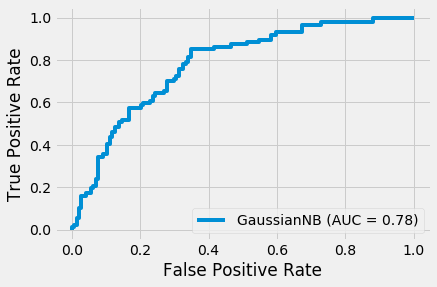

In [32]:
print("ROC curve Naive Bayes Model: \n", metrics.plot_roc_curve(nbmodel, X_test,y_test))

### Model with Random Forest

In [33]:
modelRF = RandomForestClassifier(random_state=10)
modelRF.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [34]:
predictionRF=modelRF.predict(X_test)

In [35]:
print("Accuracy Score with Random Forest Model: ", metrics.accuracy_score(y_test,predictionRF))

Accuracy Score with Random Forest Model:  0.7402597402597403


In [36]:
print("Confusion Matrix with Random Forest Model: \n", metrics.confusion_matrix(y_test,predictionRF))

Confusion Matrix with Random Forest Model: 
 [[130  14]
 [ 46  41]]


In [37]:
print("Classification Report with Random Forest Model: \n", metrics.classification_report(y_test,predictionRF))

Classification Report with Random Forest Model: 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       144
           1       0.75      0.47      0.58        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.69       231
weighted avg       0.74      0.74      0.72       231



ROC curve Random Forest Model: 


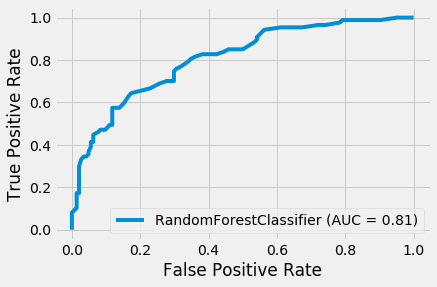

In [38]:
print("ROC curve Random Forest Model: \n", metrics.plot_roc_curve(modelRF, X_test,y_test))

### We can see that the Random Forest Model has better accuracy and F1 score than Naive Bayes model.

### Predicting with XGBoost

In [39]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [40]:
modelXG=xgboost.XGBClassifier()

In [41]:
#random_search=RandomizedSearchCV(modelXG,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [42]:
#random_search.fit(X_train,y_train)

In [43]:
#random_search.best_estimator_

In [44]:
modelXG=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=8,
              min_child_weight=3)

In [45]:
modelXG.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=8,
              min_child_weight=3)

In [46]:
predictXG=modelXG.predict(X_test)

In [47]:
score=cross_val_score(modelXG,X_train,y_train,cv=10)

In [48]:
score.mean()

0.7746331236897275

In [49]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXG))

Accuracy Score with XGBoost Model :  0.7489177489177489


In [50]:
print("Confusion Matrix with XGBoost Model: \n", metrics.confusion_matrix(y_test,predictXG))

Confusion Matrix with XGBoost Model: 
 [[127  17]
 [ 41  46]]


In [51]:
print("Classification Report with XGBoost Model: \n", metrics.classification_report(y_test,predictXG))

Classification Report with XGBoost Model: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       144
           1       0.73      0.53      0.61        87

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.71       231
weighted avg       0.75      0.75      0.74       231



ROC curve XGBoost Model: 


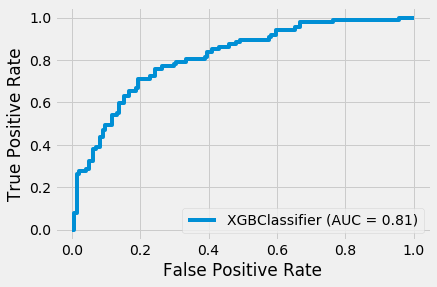

In [52]:
print("ROC curve XGBoost Model: \n", metrics.plot_roc_curve(modelXG, X_test,y_test))

## Let's try some more Parameter Tuning for XGBoost

In [53]:

## Hyper Parameter Optimization

params={
 "booster"           :['gbtree','gblinear'],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,1.5,2,5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [54]:
grid_search=GridSearchCV(modelXG,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
#grid_search.fit(X_train,y_train)

In [56]:
#grid_search.best_estimator_

In [57]:
modelXG=xgboost.XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [58]:
modelXG.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [59]:
predictXG=modelXG.predict(X_test)

In [60]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXG))

Accuracy Score with XGBoost Model :  0.7445887445887446


### Let's try to achieve better accuracy by dropping a feature "Skin Thickness" as it is correlated with BMI and Age

In [61]:
X_trainm.drop("SkinThickness",axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
X_testm.drop("SkinThickness",axis=1, inplace=True)

In [63]:
X_train=np.matrix(X_trainm)
X_test=np.matrix(X_testm)

In [64]:
modelXGnew=xgboost.XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [65]:
modelXGnew.fit(np.asmatrix(X_train),y_train)

XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [66]:
predictXGnew=modelXGnew.predict(np.asmatrix(X_test))

In [67]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXGnew))

Accuracy Score with XGBoost Model :  0.7359307359307359


In [68]:
print("Confusion Matrix with XGBoost Model: \n", metrics.confusion_matrix(y_test,predictXGnew))

Confusion Matrix with XGBoost Model: 
 [[128  16]
 [ 45  42]]


In [69]:
print("Classification Report with XGBoost Model: \n", metrics.classification_report(y_test,predictXGnew))

Classification Report with XGBoost Model: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.72      0.48      0.58        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.69       231
weighted avg       0.73      0.74      0.72       231



ROC curve XGBoost Model: 


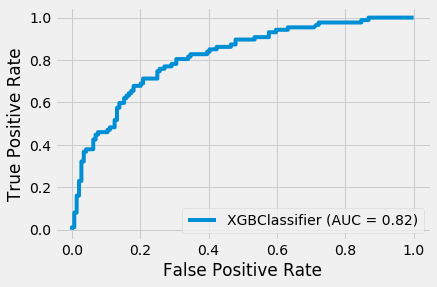

In [70]:
print("ROC curve XGBoost Model: \n", metrics.plot_roc_curve(modelXGnew, X_test,y_test))

In [71]:
modelRFnew = RandomForestClassifier()
modelRFnew.fit(np.asmatrix(X_train),y_train)

RandomForestClassifier()

In [72]:
predictionRFnew=modelRFnew.predict(X_test)

In [73]:
print("Accuracy Score with Random Forest Model New: ", metrics.accuracy_score(y_test,predictionRFnew))

Accuracy Score with Random Forest Model New:  0.7619047619047619


In [74]:
print("Confusion Matrix with Random Forest Model: \n", metrics.confusion_matrix(y_test,predictionRFnew))

Confusion Matrix with Random Forest Model: 
 [[130  14]
 [ 41  46]]


In [75]:
print("Classification Report with Random Forest Model: \n", metrics.classification_report(y_test,predictionRFnew))

Classification Report with Random Forest Model: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       144
           1       0.77      0.53      0.63        87

    accuracy                           0.76       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



ROC curve Random Forest Model: 


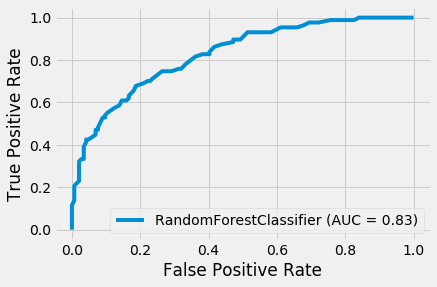

In [76]:
print("ROC curve Random Forest Model: \n", metrics.plot_roc_curve(modelRFnew, X_test,y_test))

In [77]:
#Let's try oversampling of the data

In [78]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 181
Before OverSampling, counts of label '0': 356 



In [79]:
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [80]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (712, 7)
After OverSampling, the shape of train_y: (712,) 

After OverSampling, counts of label '1': 356
After OverSampling, counts of label '0': 356


In [81]:
modelRFnew = RandomForestClassifier()
modelRFnew.fit(np.asmatrix(X_train_res),y_train_res)

RandomForestClassifier()

In [82]:
predictionRFnew=modelRFnew.predict(X_test)

In [83]:
print("Accuracy Score with Random Forest Model New: ", metrics.accuracy_score(y_test,predictionRFnew))

Accuracy Score with Random Forest Model New:  0.7705627705627706


In [84]:
print("Confusion Matrix with Random Forest Model: \n", metrics.confusion_matrix(y_test,predictionRFnew))

Confusion Matrix with Random Forest Model: 
 [[121  23]
 [ 30  57]]


In [85]:
print("Classification Report with Random Forest Model: \n", metrics.classification_report(y_test,predictionRFnew))

Classification Report with Random Forest Model: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       144
           1       0.71      0.66      0.68        87

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



ROC curve Random Forest Model: 


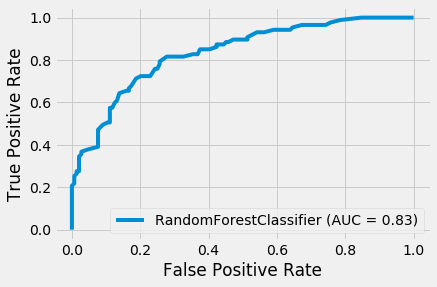

In [86]:
print("ROC curve Random Forest Model: \n", metrics.plot_roc_curve(modelRFnew, X_test,y_test))

In [87]:
#modelXGnew.fit(np.asmatrix(X),y)

In [88]:
pickle.dump(modelRFnew, open('model.pkl', 'wb'))

In [89]:
modelXGnew.feature_importances_

array([0.12991974, 0.25321922, 0.08393259, 0.12800305, 0.1142031 ,
       0.07559498, 0.2151274 ], dtype=float32)

In [90]:
modelXGnew.score(np.asmatrix(X_test),y_test)

0.7359307359307359

In [91]:
cols_when_model_builds = modelXG.get_booster().feature_names
cols_when_model_builds

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']

In [92]:
df = pd.DataFrame([cols_when_model_builds])


In [93]:
# Create new observation
new_observation = [[10,101,76,180,32.9,0.171,63]]

# Predict observation's class
print(modelXGnew.predict(new_observation))



[1]


In [94]:

new_observation = [[10,115,70,96,34.6,0.529,60]]
print(modelXGnew.predict(new_observation))

[1]
